In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("datasets/Heart Disease Cleveland UCI.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
scaler = MinMaxScaler()

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])

scaler.fit(df[['cp']])
df['cp'] = scaler.transform(df[['cp']])

scaler.fit(df[['trestbps']])
df['trestbps'] = scaler.transform(df[['trestbps']])

scaler.fit(df[['chol']])
df['chol'] = scaler.transform(df[['chol']])

scaler.fit(df[['thalach']])
df['thalach'] = scaler.transform(df[['thalach']])

scaler.fit(df[['thal']])
df['thal'] = scaler.transform(df[['thal']])

scaler.fit(df[['oldpeak']])
df['oldpeak'] = scaler.transform(df[['oldpeak']])

scaler.fit(df[['restecg']])
df['restecg'] = scaler.transform(df[['restecg']])

scaler.fit(df[['ca']])
df['ca'] = scaler.transform(df[['ca']])

scaler.fit(df[['slope']])
df['slope'] = scaler.transform(df[['slope']])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,0.833333,1,0.0,0.622642,0.246575,1,1.0,0.458015,0,0.016129,0.5,0.333333,0.0,0
1,0.833333,0,0.0,0.433962,0.257991,0,0.0,0.610687,0,0.290323,0.0,0.666667,0.0,0
2,0.770833,0,0.0,0.528302,0.228311,0,0.0,0.328244,0,0.419355,1.0,0.000000,0.0,0
3,0.750000,1,0.0,0.415094,0.356164,1,1.0,0.786260,0,0.225806,0.5,0.333333,0.0,1
4,0.729167,1,0.0,0.150943,0.194064,0,1.0,0.557252,1,0.290323,0.5,0.000000,0.0,0


In [4]:
# Split the data into features (X) and target (y)
X = df.drop('condition', axis=1)
y = df['condition']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.833333,1,0.0,0.622642,0.246575,1,1.0,0.458015,0,0.016129,0.5,0.333333,0.0
1,0.833333,0,0.0,0.433962,0.257991,0,0.0,0.610687,0,0.290323,0.0,0.666667,0.0
2,0.770833,0,0.0,0.528302,0.228311,0,0.0,0.328244,0,0.419355,1.0,0.000000,0.0
3,0.750000,1,0.0,0.415094,0.356164,1,1.0,0.786260,0,0.225806,0.5,0.333333,0.0
4,0.729167,1,0.0,0.150943,0.194064,0,1.0,0.557252,1,0.290323,0.5,0.000000,0.0


In [5]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: condition, dtype: int64

In [6]:
# Split the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Printing the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (207, 13)
X_test shape: (90, 13)


In [7]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
266,0.416667,0,1.000000,0.339623,0.326484,0,0.0,0.702290,0,0.000000,0.0,0.0,0.0
37,0.562500,0,0.333333,0.433962,0.383562,0,1.0,0.625954,0,0.209677,0.5,0.0,0.0
16,0.479167,1,0.000000,0.547170,0.392694,1,0.0,0.816794,0,0.193548,0.5,0.0,1.0
253,0.500000,0,1.000000,0.415094,0.246575,0,1.0,0.679389,0,0.000000,0.0,0.0,0.0
144,0.270833,1,0.666667,0.245283,0.260274,1,0.0,0.938931,0,0.129032,1.0,0.0,1.0


In [8]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
167,0.770833,0,1.000000,0.792453,0.232877,1,0.0,0.717557,1,0.161290,0.5,0.666667,1.0
211,0.625000,1,1.000000,0.433962,0.116438,0,0.0,0.694656,1,0.000000,0.0,0.333333,1.0
63,0.250000,1,0.333333,0.386792,0.175799,0,0.0,0.465649,0,0.000000,0.5,0.000000,0.5
154,0.166667,0,0.666667,0.245283,0.203196,0,0.0,0.755725,0,0.000000,0.0,0.000000,0.0
5,0.729167,1,0.000000,0.716981,0.230594,0,1.0,0.641221,0,0.096774,0.5,0.000000,1.0


In [9]:
log_likelihoods = []
k_rng = range(1, 10)

for k in k_rng:
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(X_train)
    log_likelihoods.append(gmm.score(X_train))

c:\Users\umerr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\umerr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\umerr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\umerr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\umerr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\umerr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

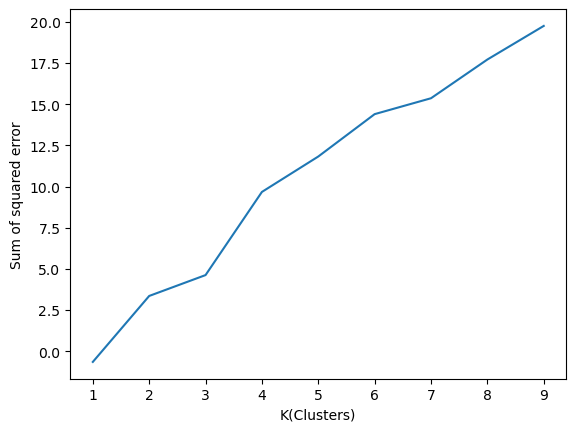

In [10]:
# Plot the elbow curve
plt.xlabel('K(Clusters)')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,log_likelihoods)

In [11]:
# Perform clustering using Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_train)

c:\Users\umerr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=2, random_state=0)

In [12]:
# Predict the cluster labels for training and test datasets
train_labels = gmm.predict(X_train)
test_labels = gmm.predict(X_test)

In [13]:
# Calculate the accuracy between the training and test datasets
train_accuracy = accuracy_score(y_train, train_labels)
test_accuracy = accuracy_score(y_test, test_labels)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.7729468599033816
Test Accuracy: 0.7444444444444445


In [14]:
# Create confusion matrix for training data
train_confusion_matrix = confusion_matrix(y_train, train_labels)

# Create confusion matrix for test data
test_confusion_matrix = confusion_matrix(y_test, test_labels)

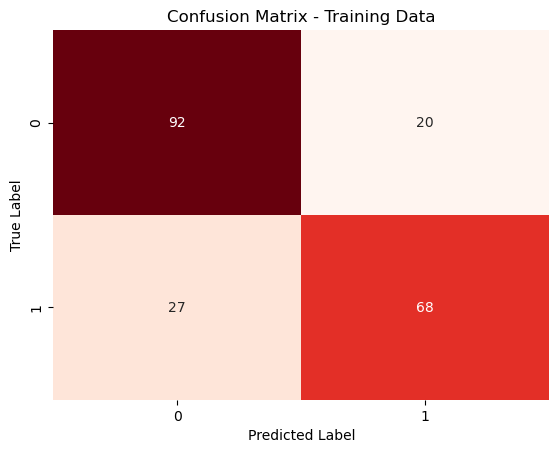

In [15]:
# Plot confusion matrix for training data
sns.heatmap(train_confusion_matrix, annot=True, cmap="Reds", fmt="d", cbar=False)
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

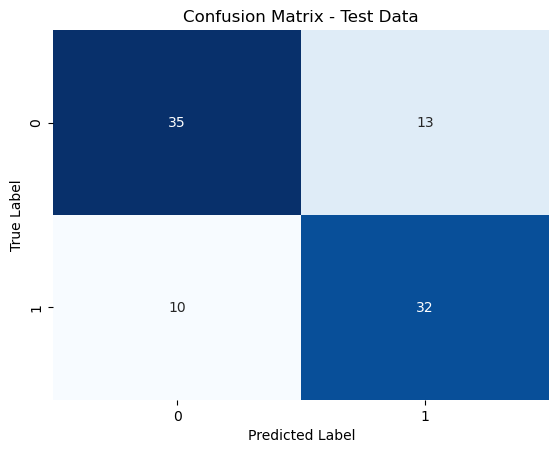

In [16]:
# Plot confusion matrix for test data
sns.heatmap(test_confusion_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [17]:
# Generate the classification report
class_report = classification_report(y_test, test_labels)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75        48
           1       0.71      0.76      0.74        42

    accuracy                           0.74        90
   macro avg       0.74      0.75      0.74        90
weighted avg       0.75      0.74      0.74        90

